# QAOA Implementation for Maxcut Problem
In this notebook ,we will implement the **Quantum Approximate Optimization Algorithm(QAOA)** to solve the **Maxcut problem** on a simple graph using **Qiskit**.

In this notebook , we will learn:
- Define graph for MaxCut problem
- Construct  the cost and mixer Hamiltonions
- Implement the QAOA circuit.
- Optimize parameters using a classical optimizer.
- Evaluate and visualize the result.

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from scipy.optimize import minimize
from qiskit import QuantumCircuit

## Step 1 -Define Graph
We represent a graph as a **list of edges** and number of nodes. initialize the graph structure  with nodes and edge representing the problem instance.

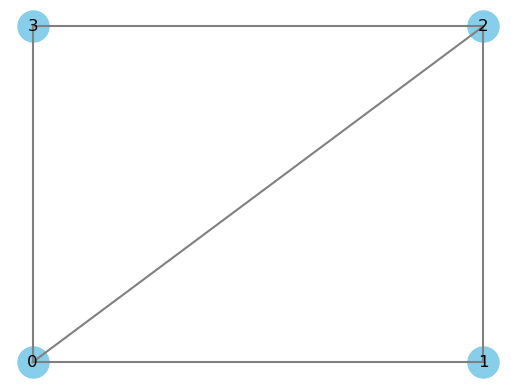

In [2]:
n_nodes=4
edges=[(0,1),(1,2),(2,3),(3,0),(0,2)] # edge list

# for visualization, node position
node_position ={0:(0,0),1:(1,0),2:(1,1),3:(0,1)}

# Draw graph
for edge in edges:
    x_value=[node_position[edge[0]][0],node_position[edge[1]][0]]
    y_value=[node_position[edge[0]][1],node_position[edge[1]][1]]
    plt.plot(x_value,y_value,color='gray')

for node ,pos in node_position.items():
    plt.scatter(pos[0],pos[1],s=500,c='skyblue')
    plt.text(pos[0],pos[1],str(node),fontsize=12,ha='center',va='center')

plt.axis('off')
plt.show()

## Step 2 - Define the QAOA circuit
construct the parametrized quantum circuit with alternating layer od problem and mixer hamiltonian.

In [3]:
def qaoa_circuit(gamma,beta,p=1):
    qc =QuantumCircuit(n_nodes)
    qc.h(range(n_nodes)) # inital hadamards

    for layer in range(p):
        # Cost unitary
        for(i,j) in edges:
            qc.cx(i,j)
            qc.rz(-2 * gamma,j)
            qc.cx(i,j)
        # Mixer unitary
        for i in range(n_nodes):
            qc.rx(2*beta ,i)
    qc.measure_all()
    return qc

## Step 3 : MaxCut Cost Function
Encode the Max-cut objective  as a hamiltonion whose ground state corrospnd to the optimal cut.

In [4]:
def maxcut_cost(bitstring):
    cost =0
    for (i,j) in edges:
        if bitstring[i] != bitstring[j]:
            cost += 1
    return cost

## Step 4 - Expectation Value
compute the expected value of the cost function for the currenet QAOA parameter.

In [47]:
def qaoa_expectation(gamma,beta,p=1,shots=1000):
    qc=qaoa_circuit(gamma,beta,p)
    backend=AerSimulator()
    result=backend.run(qc,shots=shots).result()
    counts=result.get_counts()
    exp_val=0
    for bitstring,count in counts.items():
        bitstring =bitstring[::-1] # reverse qiskit order
        exp_val+= maxcut_cost(bitstring)*count/shots
    return exp_val

## Step 5 - Classical Optimization 
use a classical optimizer to iteratively adjust circuit parameters to maximize the expectation value,

In [48]:
def objective(params):
    gamma,beta =params
    return -qaoa_expectation(gamma,beta)
init_params=[0.5,0.5]
res=minimize(objective,init_params,method='COBYLA')
gamma_opt,beta_opt=res.x
print("Optimal gamma",gamma_opt)
print("Optimal beta",beta_opt)
print("Maximum expected cut:",-res.fun)

Optimal gamma 0.25139891939526676
Optimal beta 0.33982120694209167
Maximum expected cut: 3.2529999999999992


##  Step 6 - Visualize Most Probable solution
Measure the final quantum state  and visalize the bistring representing the best cut.

Most probable solution: 1010


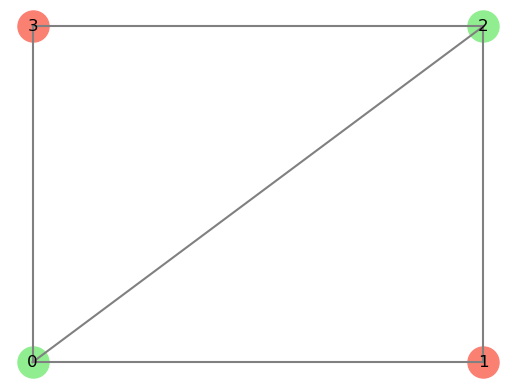

In [46]:
qc_final= qaoa_circuit(gamma_opt,beta_opt)
backend= AerSimulator()
result =backend.run(qc_final,shots=1024).result()
counts= result.get_counts()
solution_bitstring=max(counts,key=counts.get)[::-1]
print("Most probable solution:",solution_bitstring)

# Visualization
for edge in edges:
    x_values=[node_position[edge[0]][0],node_position[edge[1]][0]]
    y_values=[node_position[edge[0]][1],node_position[edge[1]][1]]
    plt.plot(x_values,y_values,color='gray')

for node ,pos in node_position.items():
    color='lightgreen' if solution_bitstring[node]=='1' else 'salmon'
    plt.scatter(pos[0],pos[1],s=500,c=color)
    plt.text(pos[0],pos[1],str(node),fontsize=12,ha='center',va='center')

plt.axis('off')
plt.show()

We seen above, our QAOA solution:
- Divides nodes into two sets:{0,2} and {1,3}
- Most probable outcome gives bitstring **1010** ,which correospond to that partition.
- Expected cut value 3.25 is slightly below the max cut 4.0 due to **quantum sampling noise**
- Gamma and Beta  are optimized angles that generated this solution.

In this notebook, We learned QAOA algorithm working and implementation. this advancec algorithm used in Devlopment of novel optimizer,advancement inerror mitigatio and compiling, exploration of deeper circuit,Hybrid quantum classical etc.

---

**Author:** *Shreya Palase*  

**Date Created:**  *17-Dec-2025*

**project:** Quantum-Computing-coding

**File:** day23_QAOAalgorithm.ipynb

Thank you and Keep Learning!

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>